In [1]:
import cmath
import math
import numpy
from matplotlib import pyplot

In [2]:
def zhukovsky(z, c):
    return z + c**2/z

In [3]:
def circle(r, theta, x0 = 0, y0 = 0):
    x = x0 + r * numpy.cos(theta)
    y = y0 + r * numpy.sin(theta)
    return x + y * 1j

In [4]:
theta = numpy.linspace(0, 2 * cmath.pi, 1000)
c = 1
r = 1.2 #((c - x0)**2 + y0**2)**0.5

x0 = c - r
y0 = 0

ksi = zhukovsky(circle(r, theta, x0 = x0, y0 = y0), c)

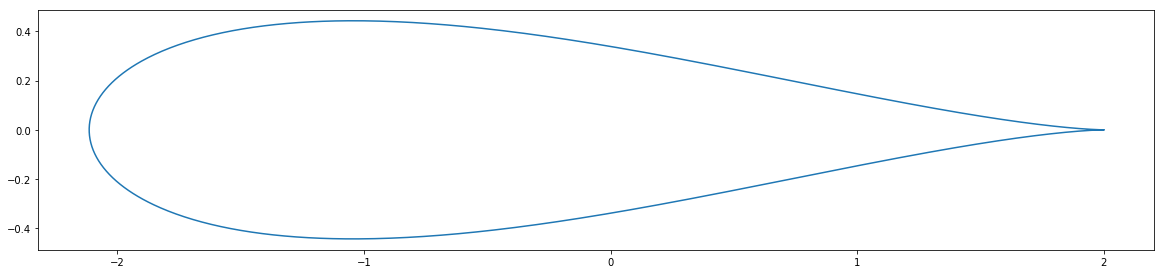

In [5]:
pyplot.figure(figsize=(20, 20))
pyplot.axes(aspect='equal')
pyplot.plot(ksi.real, ksi.imag);

In [6]:
Nr = 100
Ntheta = 125
R_circ = 1.15
x0 = -0.15
y0 = 0
r = numpy.linspace(R_circ, 5, Nr)
theta = numpy.linspace(0, 2 * cmath.pi, Ntheta)
R, Theta = numpy.meshgrid(r, theta)

X, Y = R * numpy.cos(Theta) + x0,  R * numpy.sin(Theta) + y0
Z = X + Y*1j

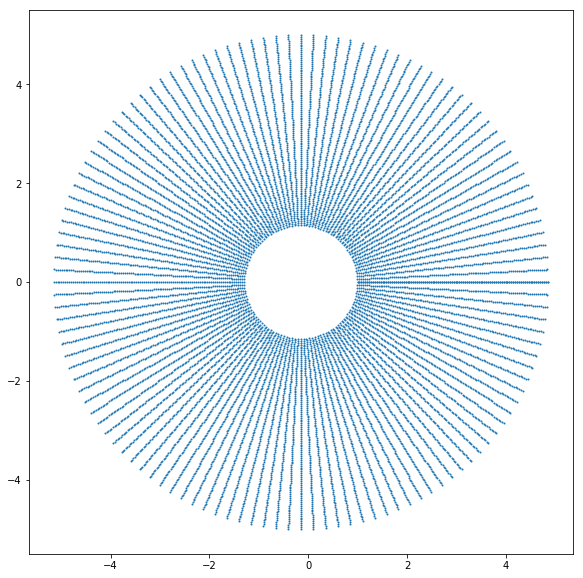

In [7]:
pyplot.figure(figsize=(10, 10))
pyplot.axes(aspect='equal')

pyplot.scatter(X, Y, s = 1)

In [8]:
KSI = zhukovsky(Z, 1)

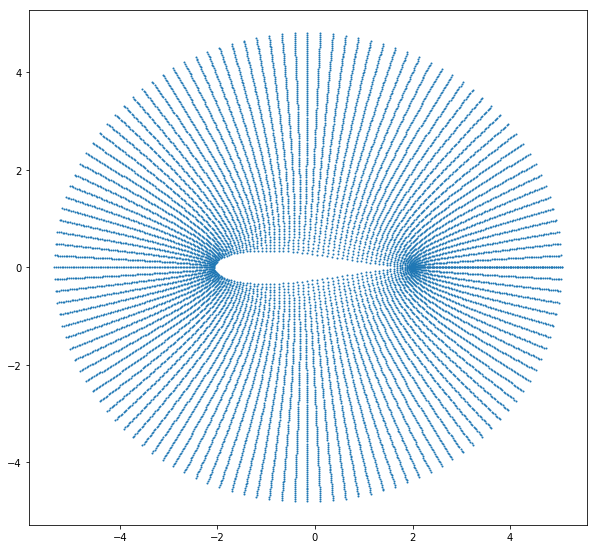

In [9]:
pyplot.figure(figsize=(10, 10))
pyplot.axes(aspect='equal')

pyplot.scatter(KSI.real, KSI.imag, s = 1)

In [10]:
u_inf = 1.0

kappa = R_circ**2 * 2 * numpy.pi * u_inf 

In [11]:
def get_velocity_doublet(strength, xd, yd, X, Y):

    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):

    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [12]:
psi_doublet = get_stream_function_doublet(kappa, x0, y0, X,Y)
psi_free_stream = u_inf * Y
psi = psi_doublet + psi_free_stream



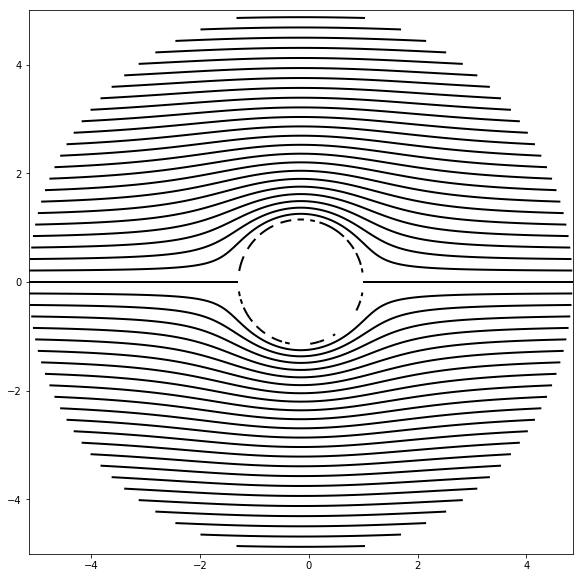

In [13]:
pyplot.figure(figsize=(10, 10))
pyplot.axes(aspect='equal')
pyplot.contour(X, Y, psi,51, colors='k', linewidths=2,\
               linestyles='solid')

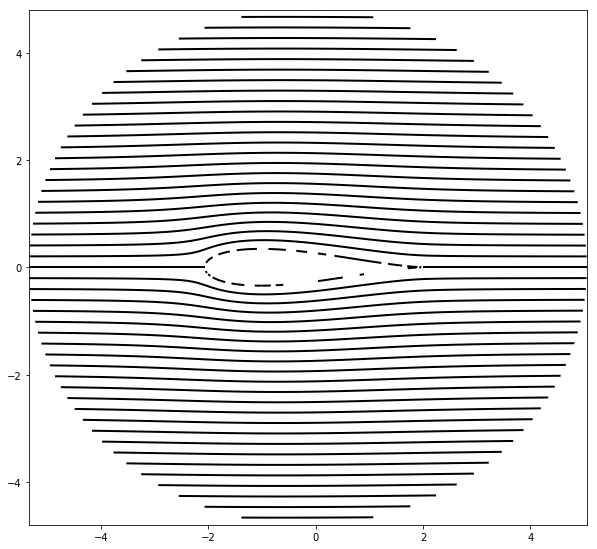

In [14]:
pyplot.figure(figsize=(10, 10))
pyplot.axes(aspect='equal')
pyplot.contour(KSI.real, KSI.imag, psi,51, colors='k', linewidths=2,\
               linestyles='solid')

In [17]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x0, y0, X,Y)
u_z = u_inf + u_doublet
v_z = v_doublet

In [18]:
w = (u_z - v_z * 1j)/(1 - (1/Z)**2)

In [19]:
u, v = w.real, -w.imag

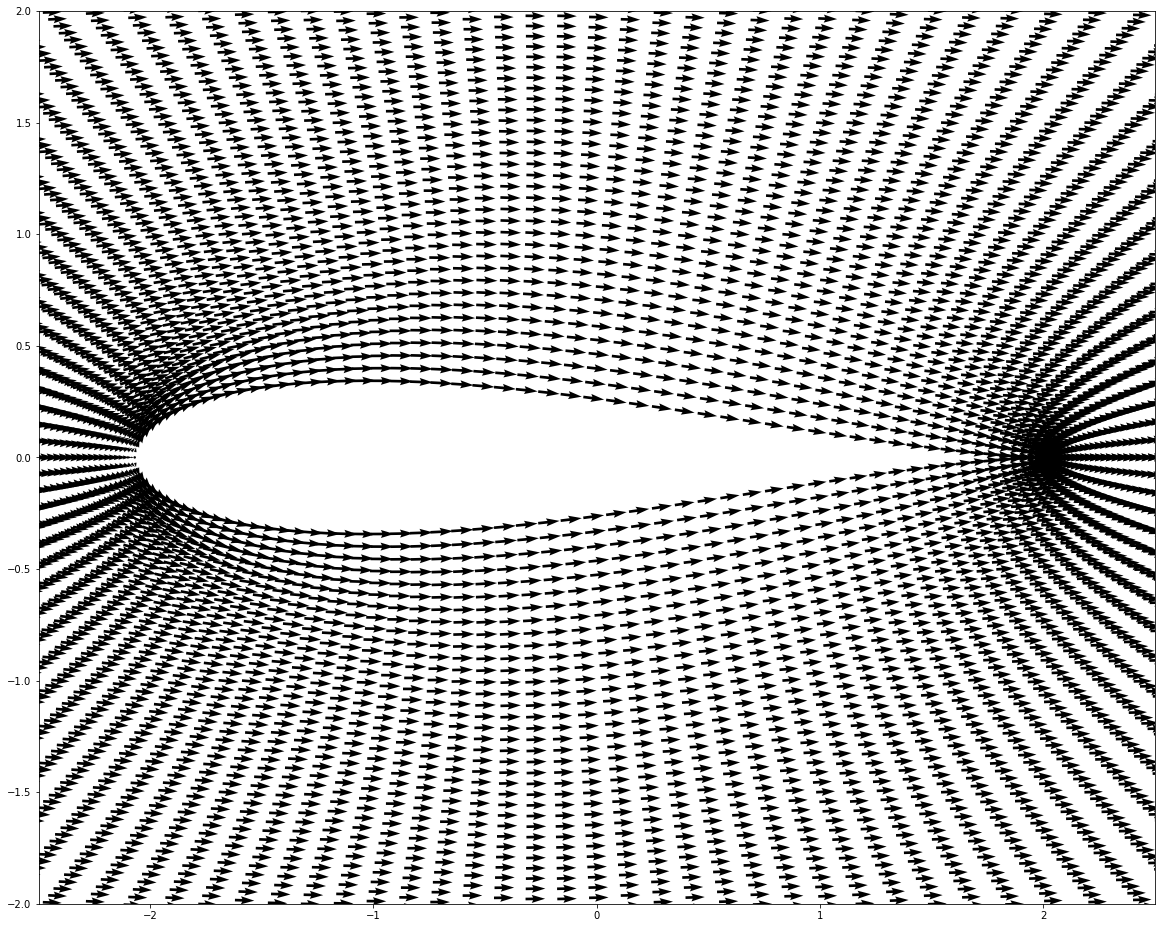

In [53]:
pyplot.figure(figsize=(20, 20))
pyplot.axes(aspect = 'equal')
pyplot.xlim(-2.5, 2.5)
pyplot.ylim(-2, 2)
pyplot.quiver(KSI.real, KSI.imag, u, v, scale=60)

In [56]:
cp_z = 1 - (u_z**2 + v_z**2)/u_inf**2

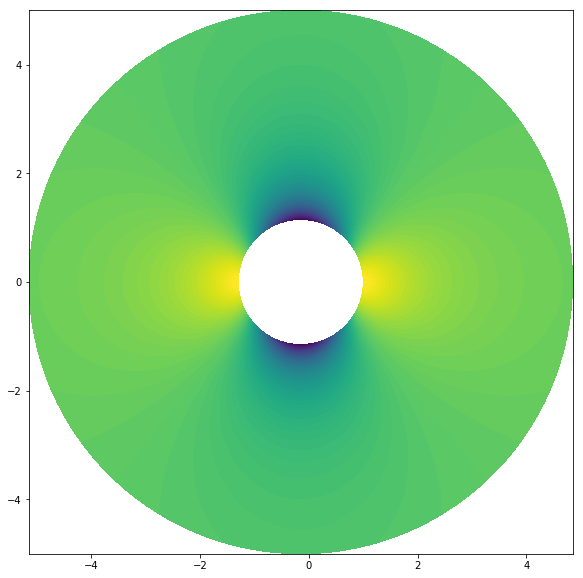

In [63]:
pyplot.figure(figsize=(10, 10))
pyplot.axes(aspect='equal')
contf = pyplot.contourf(X, Y, cp_z, levels=numpy.linspace(numpy.min(cp_z), numpy.max(cp_z), 100),\
                        extend='both')

In [64]:
cp_ksi = 1 - (u**2 + v**2)/u_inf**2

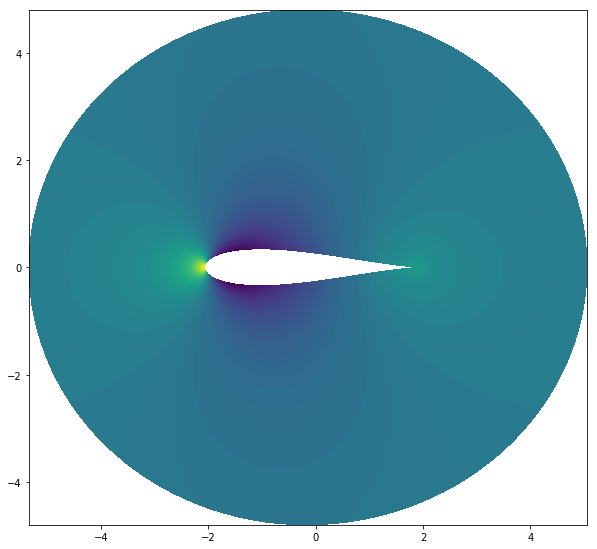

In [71]:
pyplot.figure(figsize=(10, 10))
pyplot.axes(aspect='equal')
contf = pyplot.contourf(KSI.real, KSI.imag, cp_ksi, levels=numpy.linspace(numpy.min(cp_ksi), numpy.max(cp_ksi), 100),\
                        extend='both')